In [ ]:
# encoding=utf8

# 特征工程-线性特征变换-因子分析FA


In [1]:
# Code from Chapter 6 of Machine Learning: An Algorithmic Perspective (2nd Edition)
# by Stephen Marsland (http://stephenmonika.net)

# You are free to use, change, or redistribute the code in any way you wish for
# non-commercial purposes, but please maintain the name of the original author.
# This code comes with no warranty of any kind.

# Stephen Marsland, 2008, 2014

# The Factor Analysis algorithm
import pylab as pl
import numpy as np




In [4]:
def factoranalysis(y,nRedDim):
    Ndata = np.shape(y)[0]
    N = np.shape(y)[1]
 
    y = y-y.mean(axis=0)
    C = np.cov(np.transpose(y))    
    Cd = C.diagonal()
    Psi = Cd
    scaling = np.linalg.det(C)**(1./N)
    
    W = np.random.normal(0,np.sqrt(scaling/nRedDim),(N,nRedDim))

    nits = 1000
    oldL = -np.inf

    for i in range(nits):    
    
        # E-step
        A = np.dot(W,np.transpose(W)) + np.diag(Psi)
        logA = np.log(np.abs(np.linalg.det(A)))
        A = np.linalg.inv(A)
        
        WA = np.dot(np.transpose(W),A)
        WAC = np.dot(WA,C)
        Exx = np.eye(nRedDim) - np.dot(WA,W) + np.dot(WAC,np.transpose(WA)) 

        # M-step
        W = np.dot(np.transpose(WAC),np.linalg.inv(Exx))
        Psi = Cd - (np.dot(W,WAC)).diagonal()
        #Sigma1 = (dot(transpose(y),y) - dot(W,WAC)).diagonal()/Ndata

        tAC = (A*np.transpose(C)).sum()
        
        L = -N/2*np.log(2.*np.pi) -0.5*logA - 0.5*tAC
        if (L-oldL)<(1e-4):
            print ("Stop",i)
            break
        print (L)
        oldL = L
    A = np.linalg.inv(np.dot(W,np.transpose(W))+np.diag(Psi))
    Ex = np.dot(np.transpose(A),W)
    
    return np.dot(y,Ex)



0.681375791109
0.913457140837
1.03832115735
1.14183604621
1.21067357151
1.24778920779
1.26503762707
1.27260978695
1.27607203201
1.27782634852
1.27881578431
1.27941829953
1.27980199318
1.28005229784
1.28021773936
1.28032792597
Stop 16


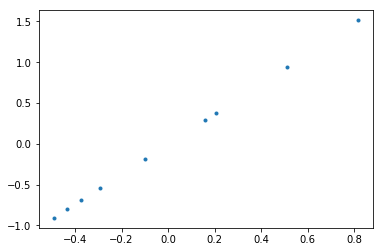

In [5]:
data = np.array([[0.1,0.1],[0.2,0.2],[0.3,0.3],[0.35,0.3],[0.4,0.4],[0.6,0.4],[0.7,0.45],[0.75,0.4],[0.8,0.35]])
newData = factoranalysis(data,2)
pl.plot(newData[:,0],newData[:,1],'.')
pl.show()